In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [3]:
f_meta = h5py.File('../6814_2/6814_2_metadata.hdf5')
f_meta.keys()

<KeysViewHDF5 ['fov_wells', 'fov_wells_backup', 'full_data', 'mask', 'mean_intensity', 'provenance_tracking', 'timestamp']>

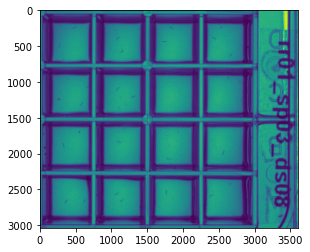

In [4]:
pic = f_meta['full_data'][0]
plt.imshow(pic)

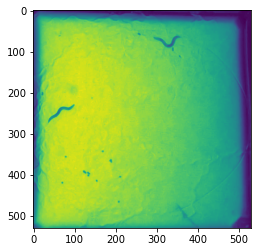

In [5]:
pic_s = pic[2340:2870, 2320:2850]
plt.imshow(pic_s)

In [7]:
f_meta['fov_wells'][-1]

(2227, 2965, 2277, 3015, b'A1', 1)

In [2]:
# Input file
fN = h5py.File("../6814_2/6814_2_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../6814_2/6814_2_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [3]:
# Get wells - data from timeseries_data, at position [2]

wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    if well in well_dict.keys():
        well_dict[well].append(i)

In [4]:
# get well by well, and store
d4 = [180, 710, 160, 690]
d3 = [180, 710, 880, 1410]
d2 = [180, 710, 1600, 2130]
d1 = [180, 710, 2320, 2850]

c4 = [895, 1425, 160, 690]
c3 = [895, 1425, 880, 1410]
c2 = [895, 1425, 1600, 2130]
c1 = [895, 1425, 2320, 2850]

b4 = [1620, 2150, 160, 690]
b3 = [1620, 2150, 880, 1410]
b2 = [1620, 2150, 1600, 2130]
b1 = [1620, 2150, 2320, 2850]

a4 = [2340, 2870, 160, 690]
a3 = [2340, 2870, 880, 1410]
a2 = [2340, 2870, 1600, 2130]
a1 = [2340, 2870, 2320, 2850]

In [6]:
well_names = list(well_dict.keys())
well_names

['A1',
 'A2',
 'A3',
 'A4',
 'B1',
 'B2',
 'B3',
 'B4',
 'C1',
 'C2',
 'C3',
 'C4',
 'D1',
 'D2',
 'D3',
 'D4']

In [8]:
for well in well_names[10:]:
    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../6814_2/", sequential=True)

[35, 36, 2428]
[0, 0, 3700]
--------------------C3------------------------
Starts at:  0
Finish frame_index:  0
--- 0.15908026695251465 seconds ---
Finish frame_index:  200
--- 5.529106140136719 seconds ---
Finish frame_index:  400
--- 10.715979099273682 seconds ---
Finish!
--- 15.833433866500854 seconds ---
length of list_stack:  600
unique_worm_id:  [35, 36]
--------------------C3------------------------
Starts at:  0
Finish frame_index:  0
--- 0.026133060455322266 seconds ---
Finish frame_index:  200
--- 4.9442057609558105 seconds ---
Finish frame_index:  400
--- 9.972684621810913 seconds ---
Finish!
--- 15.093469381332397 seconds ---
length of list_stack:  600
unique_worm_id:  [35, 36]
--------------------C3------------------------
Starts at:  3700
Finish frame_index:  3800
--- 2.5801467895507812 seconds ---
Finish frame_index:  4000
--- 7.5163233280181885 seconds ---
Finish frame_index:  4200
--- 12.472640991210938 seconds ---
Finish!
--- 14.971878290176392 seconds ---
length of l

# Make raw wells 
well by well